In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('card_transdata.csv')

In [28]:
df.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [29]:
df.tail(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999990,20.334489,11.437333,0.699527,1.0,1.0,0.0,1.0,0.0
999991,26.807213,0.102574,2.746114,1.0,0.0,0.0,1.0,0.0
999992,9.844674,0.250108,0.814046,1.0,0.0,0.0,1.0,0.0
999993,4.846253,2.844450,0.867740,1.0,0.0,0.0,1.0,0.0
999994,3.295884,0.085712,0.831991,1.0,0.0,0.0,1.0,0.0
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Initial Questions:

# 1. What kind of high level information does this dataset give us? Why would this dataset be needed?
    # To understand trends in fraudulent transactions.
# 2. What features does it have? What are their data types? How many observations do we have?
    # Answered later.
# 3. What is the granularity of the data?
    # Transaction Level

# Assumptions:

    # We would be able to understand which types of transactions are more likely to be fraud after analysing this dataset.
    # We can do this by focusing on the properties/feautures of the transaction.
    # Fraudulent transactions are more likely to happen if chip is not used, and/or pin is not used.
    # For online orders, we would expect fraud rate to be lower.
    # We would expect a positive relationship between ratio to median price to fraud.

# Concerns around dataset:

    # Documentation of column repeat_retailer is not great reducing the usability of the dataset.
    # We do not have a transaction_id either which would have been helpful in identifying duplicate data.

In [30]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [31]:
# We see that data types which must be boolean/int are stored as floats, which might be inconvinient since we want to treat these as categorical variables rather than continuous ones.
# Hence, we change the data types to 'clean' the data.

df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']] = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']].astype(int)
print(df.head(1))

# Now we have all columns in data types we need.

   distance_from_home  distance_from_last_transaction  \
0           57.877857                         0.31114   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                         1.94594                1          1   

   used_pin_number  online_order  fraud  
0                0             0      0  


In [32]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# From the above statistics, we care most about the mean as it tells us key benchmarks:
# Most transactions are from repeat retailers (88%).
# Most transactions don't have chip used (35%).
# Most transactions don't use pin number (10%).
# Most transactions are online (65%).
# Fraudulent are ~9%.

In [13]:
# Since we do not know much about the context behind repeat_retailer, we choose to drop it.

df = df.drop('repeat_retailer', axis = 1, errors = 'ignore')
df.head(1)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,1.94594,1,0,0,0


In [41]:
# Looking for duplicate data

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# No duplicates found. However, should some come in the future, we should anyway drop them:

df.drop_duplicates()

number of duplicate rows:  (0, 7)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,0,0,0
1,10.829943,0.175592,1.294219,0,0,0,0
2,5.091079,0.805153,0.427715,0,0,1,0
3,2.247564,5.600044,0.362663,1,0,1,0
4,44.190936,0.566486,2.222767,1,0,1,0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,0,0,0
999996,19.872726,2.683904,2.778303,1,0,0,0
999997,2.914857,1.472687,0.218075,1,0,1,0
999998,4.258729,0.242023,0.475822,0,0,1,0


In [42]:
# Checking for missing or null values

print(df.isnull().sum())

# No null values found.

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


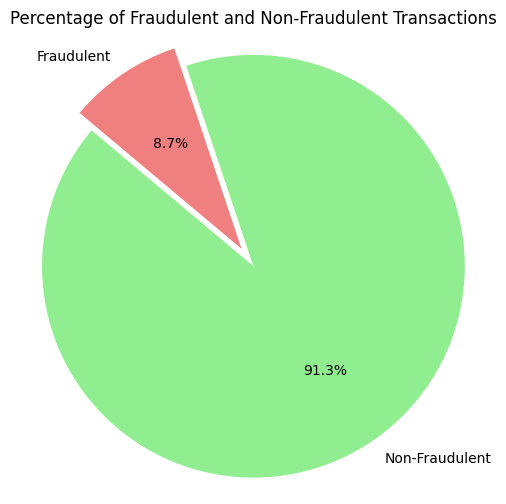

In [25]:
# Piechart: helps to get a first overview of the distribution of transaction (fraud or non-fraud) 

fraud_counts = df['fraud'].value_counts()

# Create a pie chart
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [fraud_counts[0], fraud_counts[1]]
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Percentage of Fraudulent and Non-Fraudulent Transactions')
plt.axis('equal') 

plt.show()

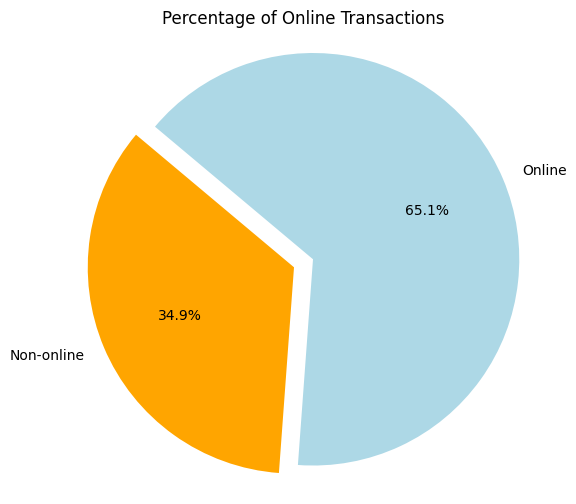

In [38]:
# Piechart: helps to get a first overview of the distribution of online and non-online transactions 

fraud_counts = df['online_order'].value_counts()

# Create a pie chart
labels = ['Non-online', 'Online']
sizes = [fraud_counts[0], fraud_counts[1]]
colors = ['orange', 'lightblue']
explode = (0, 0.1)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=explode, startangle=140)
plt.title('Percentage of Online Transactions')
plt.axis('equal') 

plt.show()

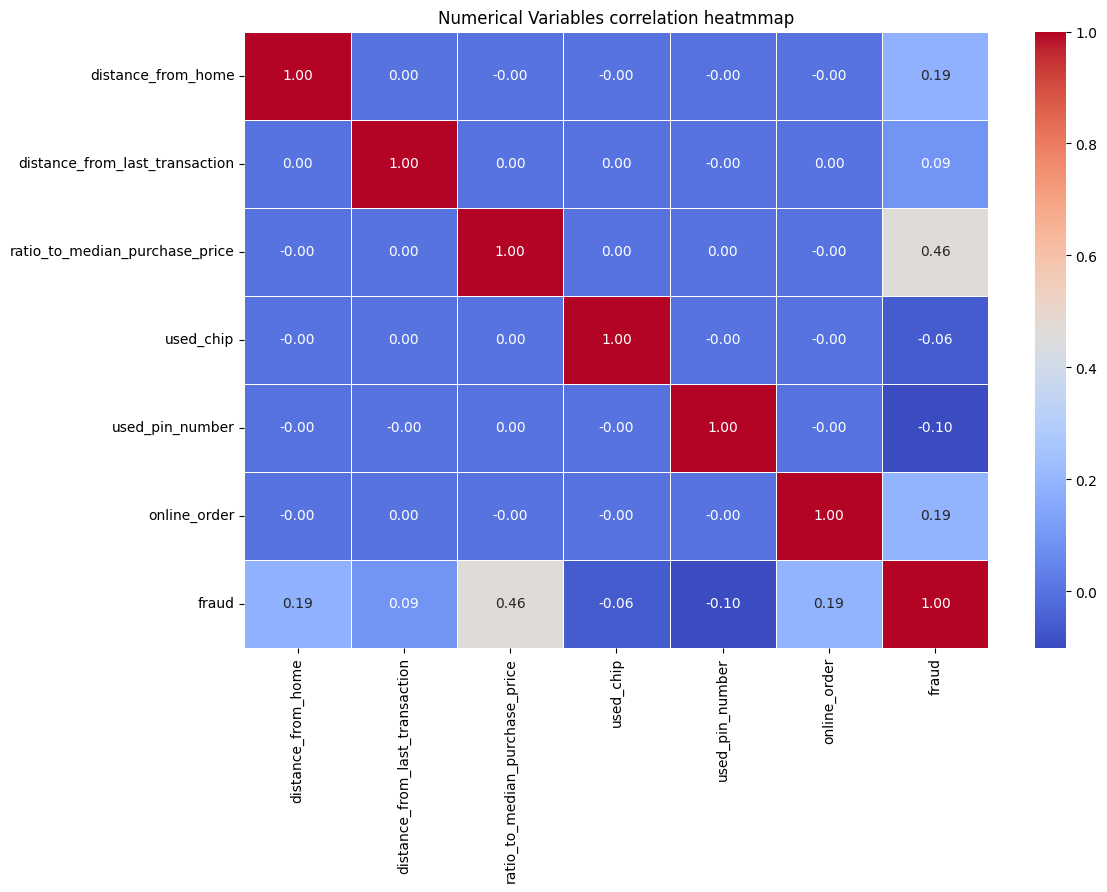

In [6]:
# Heatmap: this helps us to finally visualize the correlation between different variables, like whether a chip or the pin was used and so on.

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Numerical Variables correlation heatmmap')
plt.show()

In [ ]:
# Inferences from Heatmap:

# 1. Our assumptions about used_chip and used_pin_number having a positive correlation with fraud were true, albeit the relationship is not very strong.
# 2. ratio_to_median_purchase_price has the strongest positive correlation with fraud as we had initially assumed.
# 3. distance_from_home and online_order are also mildly positively correlated to fraudulent transactions which is intuitive.

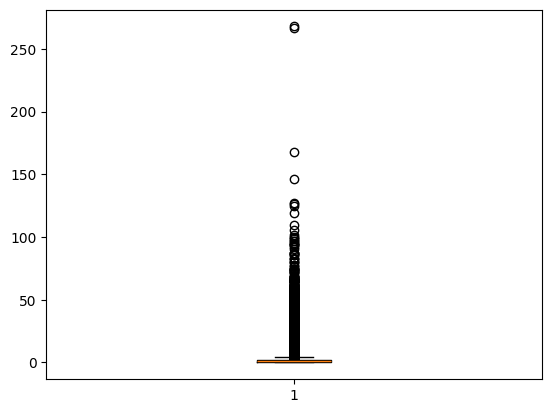

2.096370265022636


In [49]:

# Distribution of ratio_to_median_purchase_price

plt.boxplot(df['ratio_to_median_purchase_price'])
plt.show()

print(np.percentile(df['ratio_to_median_purchase_price'], 75))

In [ ]:
# We can see that 75% of all observations are below 2.1 ratio to median.
# We can also see there are quite a few outliers and the range is > 250.

2.096370265022636


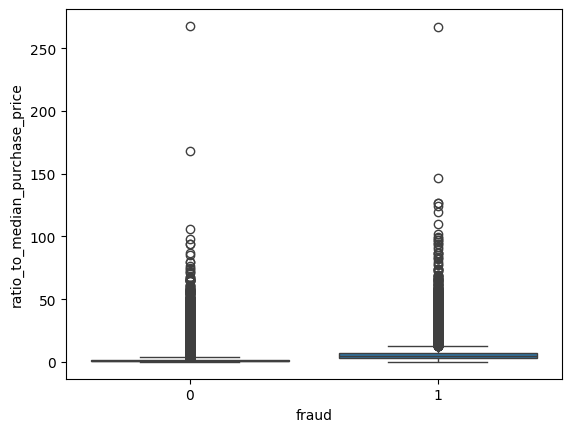

In [46]:
# Create a boxplot split by fraud

sns.boxplot(x = 'fraud', y = 'ratio_to_median_purchase_price', data = df)

print(np.percentile(df['ratio_to_median_purchase_price'], 75))

In [ ]:
# We can interpret from this that transactions with more fraud had more variation in the ratio_to_median_purchase_price
# We also see that both of them have a high number of outliers.

In [ ]:
# After analysing the dataset with the help of our chosen visualizations we can say that our assumptions were supported by the data.

# How can we dive deeper into finding whether a transaction is likely fraudulent or not?
    # 1. We need clear documentation of all columns that exist so that dataset usability is higher e.g. repeat retailer had to be left out due to little context.
    # 2. We could have customer level data to understand whether for a specific customer we might be able to more precisely understand anomalies. E.g. ratio to median price would
    #   be different for every customer.
    # 3. We could have benefited from the absolute prices and seen the direct relationship with fraudulent transactions.